# Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploración con Pandas

In [ ]:
my_data = pd.DataFrame(pd.read_csv("/content/datosGringosEscolaridad.csv"))

## Sobre los datos 
 - **Year:** el año representado por los datos.

- **Sex:** sexo de los estudiantes mostrados en la fila; 
> F para mujeres(female);
> M para hombres (male); 
> A para todos (all).
 
- **Min degree:** el grado representado por la fila.

- **Total:** el porcentaje total de estudiantes del género especificados que alcanzaron al menos el míínimo nivel de educación en ese año
 
 **White/Black/.../Two or more races:** Porcentaje de estudiantes con esa
etnicidad y el género especificado que alcanzaron el míínimo nivel de educación en ese año.

In [ ]:
my_data.head(10)

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,1920,A,high school,---,22.0,6.3,---,---,---,---,---
1,1940,A,high school,38.1,41.2,12.3,---,---,---,---,---
2,1950,A,high school,52.8,56.3,23.6,---,---,---,---,---
3,1960,A,high school,60.7,63.7,38.6,---,---,---,---,---
4,1970,A,high school,75.4,77.8,58.4,---,---,---,---,---
5,1980,A,high school,85.4,89.2,76.7,58.0,---,---,---,---
6,1990,A,high school,85.7,90.1,81.7,58.2,---,---,---,---
7,1995,A,high school,86.8,92.5,86.7,57.1,---,---,81.5,---
8,2000,A,high school,88.1,94.0,86.8,62.8,---,---,79.2,---
9,2005,A,high school,86.2,92.8,87.0,63.3,95.5,99.5,80.2,91.4


1. Descarga el archivo datosGringosEscolaridad.csv y cárgalo en pandas. El archivo utiliza el síímbolo ’---’ para los valores faltantes. Consulta la documentacióón de la función read csv y revísala con morbo; para este inciso pon atención especial en el paráámetro na_values para manejar apropiadamente el conjunto de datos.

> Observamos que nuestros valores nulos en este caso están representados por tres líneas (---), hemos de especificarlo a la hora de cargar los datos haciendo uso de *na_values*.

In [ ]:
Dschool = pd.DataFrame(pd.read_csv("/content/datosGringosEscolaridad.csv", na_values = "---"))

In [ ]:
Dschool.head(10)

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,1920,A,high school,NaN,22.0,6.3,NaN,NaN,NaN,NaN,NaN
1,1940,A,high school,38.1,41.2,12.3,NaN,NaN,NaN,NaN,NaN
2,1950,A,high school,52.8,56.3,23.6,NaN,NaN,NaN,NaN,NaN
3,1960,A,high school,60.7,63.7,38.6,NaN,NaN,NaN,NaN,NaN
4,1970,A,high school,75.4,77.8,58.4,NaN,NaN,NaN,NaN,NaN
5,1980,A,high school,85.4,89.2,76.7,58.0,NaN,NaN,NaN,NaN
6,1990,A,high school,85.7,90.1,81.7,58.2,NaN,NaN,NaN,NaN
7,1995,A,high school,86.8,92.5,86.7,57.1,NaN,NaN,81.5,NaN
8,2000,A,high school,88.1,94.0,86.8,62.8,NaN,NaN,79.2,NaN
9,2005,A,high school,86.2,92.8,87.0,63.3,95.5,99.5,80.2,91.4


2. Explorar la informacióón supone plantear preguntas y manipular los datos de manera apropiada. Supongamos, por ejemplo, que quieres saber cuál es el porcentaje de los distintos grados completados en un rango de años para un sexo determinado.
> **Escribe una función explora rangoAnhos que tenga como entrada un año inicial, un año final y un sexo, y devuelva la subtabla que corresponda a los datos solicitados. Si no hay datos con los parámetros indicados, tu función
debe devolver None.**

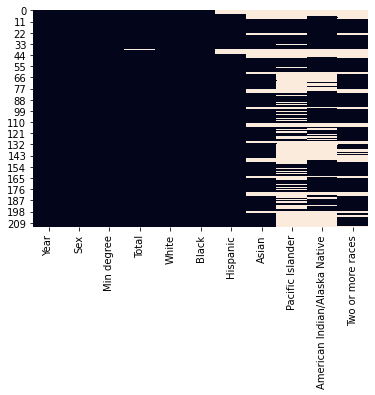

In [ ]:
sns.heatmap(Dschool.isnull(), cbar=False)

In [ ]:
def rangoAnhos(initial_year, final_year, sex):
  """
  initial_year = año inicial
  final_year = año de graduación (I guess)
  sex = Sexo del grupo
  """
  # Observamos que no contamos con ningun dato nulo en la columan de Year y de Sex
  # por lo tanto no tendremos que preocuparnos por ningun error que pueda surgir 

  result = Dschool.loc[(Dschool.Year >= initial_year) & (Dschool.Year <= final_year) & (Dschool.Sex == sex)]
  if len(result) == 0:
    return (None)
  else:
    return (result)


In [ ]:
rangoAnhos(1999, 2010, "M")

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
81,2000,M,high school,86.7,92.9,87.6,59.2,NaN,NaN,68.5,NaN
82,2005,M,high school,85.0,91.8,86.6,63.2,96.7,99.1,73.0,89.1
83,2006,M,high school,84.4,92.3,84.2,60.5,97.2,97.8,75.0,89.2
84,2007,M,high school,84.9,92.7,87.4,60.5,96.3,NaN,76.6,92.9
85,2008,M,high school,85.8,92.6,85.7,65.6,95.4,100.0,90.5,92.7
86,2009,M,high school,87.5,94.4,88.8,66.2,96.2,98.2,77.5,92.0
87,2010,M,high school,87.4,94.6,87.9,65.7,93.5,98.2,93.2,87.9
97,2000,M,associate's,35.3,40.7,24.1,13.0,NaN,NaN,17.6,NaN
98,2005,M,associate's,33.4,39.6,22.7,16.1,66.7,18.5,19.9,31.0
99,2006,M,associate's,33.8,41.5,21.3,12.8,67.9,25.6,18.9,28.4


3. ¿Cómo se compara la obtención de un grado de acuerdo con el sexo? 
> **Escribe la función comparaGradoPorSexo_anho que acepte de entrada grado y año, y devuelva la tupla (% de hombres con al menos ese grado en ese año, % de mujeres con al menos ese grado en ese año)**

In [ ]:
def comparaGradoPorSexo_anho(degree, year):
  """
  degree = corresponde al grado minimo en los datos
  year = corresponde al año que se solicita
  return = (Porcentaje Hombres, Porcentaje Mujeres)
  """
  filter1 = Dschool.loc[(Dschool["Min degree"] == degree) & (Dschool.Year == year)]
  women = filter1.loc[(filter1.Sex == "F")]
  men = filter1.loc[(filter1.Sex == "M")]
  # Dado el mapa de calor anterior para detectar valores nulos, observamos
  # que tenemos un dato nulo en la columna Total
  # tenemos una probabilidad muy baja pero para que nuestra funcióón no truene
  # añadimos un try except 
  try:
    percentMen = list(men["Total"])[0]
  except:
    percentMen = 0
  
  try:
    percentWomen = list(women["Total"])[0]
  except:
    percentWomen = 0
  result = (percentMen, percentWomen)
  return (result)
  

In [ ]:
comparaGradoPorSexo_anho("high school", 1990)

(84.4, 87.0)

# Seaborn

4. Grafica el porcentaje total a través de los años de personas que obtuvieron al
menos un grado universitario (bachelor). Utiliza marcadores Y segmentos de
línea. Incluye en los mismos ejes la gráfica para hombres y mujeres.

In [ ]:
set(list(Dschool["Min degree"]))

{"associate's", "bachelor's", 'high school', "master's"}

In [ ]:
bachelor = Dschool.loc[(Dschool["Min degree"] == "bachelor's") & (Dschool.Sex != "A")]
bachelor.head(5)

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
112,1980,M,bachelor's,24.0,26.8,10.5,8.4,NaN,NaN,NaN,NaN
113,1990,M,bachelor's,23.7,26.6,15.1,7.3,NaN,NaN,NaN,NaN
114,1995,M,bachelor's,24.5,28.4,17.4,7.8,NaN,NaN,NaN,NaN
115,2000,M,bachelor's,27.9,32.3,18.4,8.3,NaN,NaN,NaN,NaN
116,2005,M,bachelor's,25.5,30.7,14.2,10.2,61.0,17.2,14.5,24.5


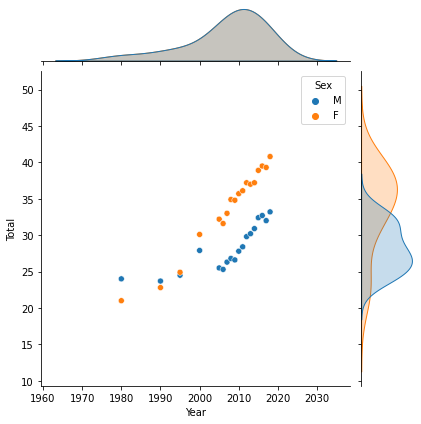

In [ ]:
sns.jointplot(data=bachelor, x="Year", y="Total", kind="scatter", hue="Sex")
#['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']

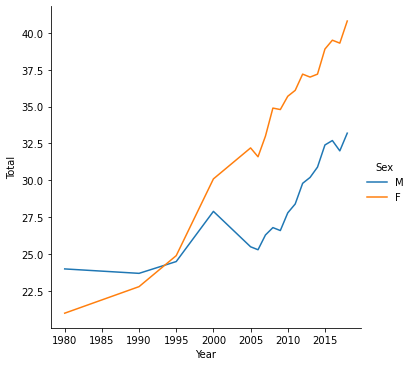

In [ ]:
sns.relplot(data=bachelor, x="Year", y="Total", hue="Sex", kind="line")

5. Crea una función que, dado un año inicial y un año final, genere gráficas que permitan comparar el porcentaje total, en el rango de años, de hombres/mujeres/todos que alcanzaron al menos grado de preparatoria (high school)

In [ ]:
def graph_generate(initial_year, final_year):
  """
  initial_year = like "2000", Año de inicio para la gráfica
  final_year = like "2020", Año final para la gráfica
  """
  result = Dschool.loc[(Dschool.Year >= initial_year) & (Dschool.Year <= final_year) & (Dschool["Min degree"] == "high school")]
  S = sns.relplot(data=result, x="Year", y="Total", hue="Sex", kind="line", palette="dark")
  return (S)

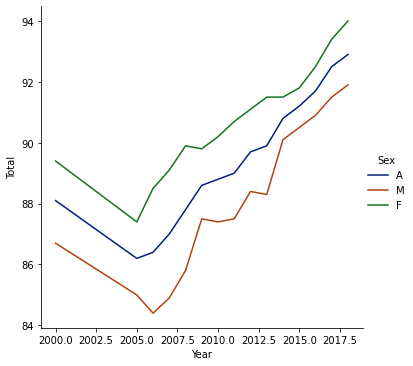

In [ ]:
graph_generate(2000, 2020)

6. Imagina que queremos explorar que sucedió de acuerdo a la etnicidad. Escribe una variante de la función anterior que permita especificar etnicidad como parámetro de entrada y genere una gráfica (del tipo que prefieras) por año (para ese rango de años) y por sexo para la etnicidad señalada (sugerencia: intenta con otro estilo/diseño/tipo de gráfica).

In [ ]:
Dschool.head(3)

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,1920,A,high school,NaN,22.0,6.3,NaN,NaN,NaN,NaN,NaN
1,1940,A,high school,38.1,41.2,12.3,NaN,NaN,NaN,NaN,NaN
2,1950,A,high school,52.8,56.3,23.6,NaN,NaN,NaN,NaN,NaN


In [ ]:
def graph_generate_e(initial_year, final_year, ethnicity):
  """
  initial_year = like "2000", Año de inicio para la gráfica
  final_year = like "2020", Año final para la gráfica
  ethnicity = like "Hispanic", por defecto se toma la etnicidad hispanica
  """
  # Filtramos para los años solicitados
  result = Dschool.loc[(Dschool.Year >= initial_year) & (Dschool.Year <= final_year) & (Dschool.Sex != "A")]
  # NO ESTABA SEGURO DE SI SE REQUERIA TODOS (A) ASÍÍ QUE MEJOR LO QUITE
  # ASI MISMO, no sabía si tamiéén tenia que ser del high school pero por si las dudas
  # dejde la línea para que solo se descomente
  #result = Dschool.loc[(Dschool.Year >= initial_year) & (Dschool.Year <= final_year) & (Dschool.Sex != "A") & (Dschool["Min degree"] == "high school")]
  # result = Dschool.loc[(Dschool.Year >= initial_year) & (Dschool.Year <= final_year)]
  try:
    # seleccionamos los paráámetros que necesitamos
    result = result[["Sex", "Total", "Year", ethnicity]]
  except:
    return("Corrobora que hayas introducido bien ethnicity")

  #S = sns.relplot(data=result, x="Year", y="Total", kind = "line", hue="Sex", palette="dark")
  
  #S = sns.jointplot(data=result, x="Year", y="Total", kind="scatter", hue="Sex")
  
  S = sns.displot(data = result, x="Year", y = "Total", hue="Sex")#,  binwidth=5)
  S.set(title='Etnicidad')
  return (S)

>NOTA PARA MI: Los cuadros naranja oscuro, tienen al azul por debajo, lo mismo para los azules.

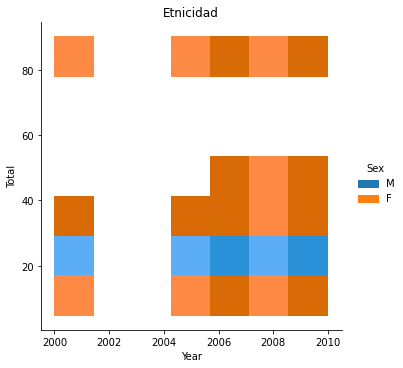

In [ ]:
graph_generate_e(2000, 2010, ethnicity="Hispanic")

7. Plantea una pregunta que consideres interesante y diseña una visualización que permita explorarla.

> Según la etnicidad, vamos a ver **¿qué raza es la que menos oportunidad a tenido de estudio?** así mismo, observar hombres y mujeres únicamente y no la categoria "A" Que corresponde a todos.

> Para poder resolver mi pregunta con una visualización fue necesario juntar todas las razas en una sola columna, he de mencionar (para que esto no se vaya a tomar como Plagio) que Nikolai me ayudo y me proporciono un código que ya hacía esto, que el programo. Yo lo modifique un poco para adaptarlo a una función de tal manera que le pasarás un arreglo con los razas que querias añadir a la columna. 
y eliminando "Total" de la columna Type debido a que "Total" Corresponde al porcentaje de generos, no de razas, segun lo que leí en la descripción de los datos. 

In [ ]:

def joinRaces(races):
  """
  races = arreglo con las razas que deseas tomar para la gráfica
  """
  School = Dschool.iloc[:,:4]
  School["Type"] = ["Total"]*214

  ethnicDict = races
  for i in range(len(ethnicDict)):
    SchoolTMP = Dschool.iloc[:,[0,1,2,i+4]]
    SchoolTMP = SchoolTMP.rename(columns={f"{ethnicDict[i]}":"Total"})
    SchoolTMP["Type"] = [f"{ethnicDict[i]}"]*214
    School = School.append(SchoolTMP)

  School = School.loc[(School.Sex != "A")]
  School = School.loc[(School.Type != "Total")]

  return (School)

ethnicDict = ["White", "Black", "Hispanic", "Asian", "Pacific Islander", "American Indian/Alaska Native", "Two or more races"]

byraces = joinRaces(ethnicDict)

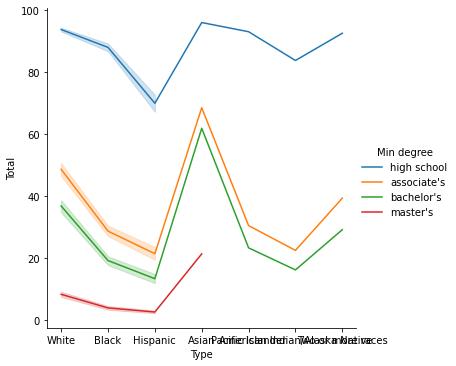

In [ ]:
sns.relplot(data = byraces, x="Type", y = "Total", hue="Min degree", kind="line")#,  binwidth=3)

8. Justifica la elección que hiciste para la visualización de los dos incisos anteriores.

> La razón de mi elección se debe a que a primera vista claramente se puede ver lo que comparte, es decir, con leer la pregunta y ver la gráfica o únicamente viendo la gráfica y teniendo la fuente de datos, podemos ver que es lo que trata de transmitirnos la gráfica. 
Tome entonces como razón principal: por que logra entenderse únicamente viendo la gráfica y la fuente de los datos.

# Reflexión

9. ¿Cuáles consideras que son las limitaciones de este conjunto de datos?
> Retomando la gráfica de calor para detectar valores nulos, una de las principales limitaciones es la falta de datos, observamos que para blancos y negros no tenemos ausencia de datos, pero para las demás razas tenemos muchos datos faltantes, consecuentemente en los analisis que hagamos sobre los datos, pueden resultar sesgados ante la ausencia de datos de algunas razas. 

10. Supón que alguien te contrató para llevar a cabo este análisis exploratorio.

¿Hay preocupaciones éticas que puedes identificar en el ejercicio que realizaste?
> Una preocupación Ética es ante el hecho de que la raza "hispana" este teniendo una cantidad de grados baja respecto a las demás razas, así mismo ver a qué se debe que las razas diferentes de: Blanca, Negra, Hispana y Asiatica. No tengan masters. (Que claro, recordemos que tenemos muchos datos faltantes, tal vez esa sea una razón) 

¿Qué advertencias o recomendaciones incluirías en tu reporte?
> La ausencia de datos (Ver las siguientes celdas) y como esto puede afectar a las conclusiones. Es decir, faltan ¡muchos datos! Entonces no tenemos mucha seguridad para maniobrar y tomar algunas decisiones. A menos de que se trabaje únicamente con las razas: Blanca, Negra e Hispana.


> Observe cuanto se reduce el conjunto de datos cuando eliminas un registro que tiene almenos una columna NaN

In [ ]:
Dschool.shape
# TENEMOS 214 REGISTROS INICIALMENTE

(214, 11)

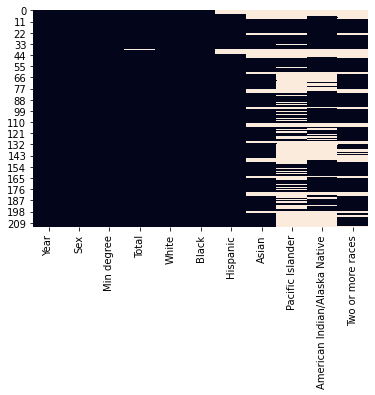

In [ ]:
sns.heatmap(Dschool.isnull(), cbar=False)

In [ ]:
data_without_nan=Dschool.dropna() 
data_without_nan.shape
# SE REDUJO MÁS DE LA MITAD!!

(89, 11)

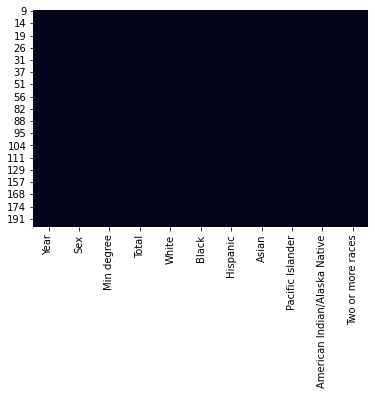

In [ ]:
sns.heatmap(data_without_nan.isnull(), cbar=False)

> Si trabajamos con datos "completos" observamos que nuestro conjunto de datos se reduce ¡más de la mitad!

Tomamos la gráfica del ejercicio 4 de la parte de Seaborn pero ahora los datos que usamos son los datos "completos", es decir, los que no tienen valores NaN

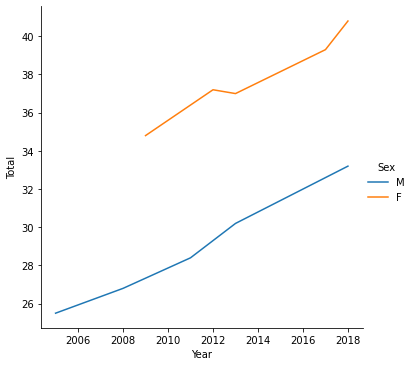

In [ ]:
data_without_nan = data_without_nan.loc[(data_without_nan["Min degree"] == "bachelor's") & (data_without_nan.Sex != "A")]
sns.relplot(data=data_without_nan, x="Year", y="Total", hue="Sex", kind="line")

Podemos notar la ausencia de datos rápidamente.

# Bonus: Treemaps 

Si tienes tiempo, intenta una  ́ultima grááfica (túú elige el/los atributos que quieras explorar de esta base de datos) utilizando gráficos de rectángulo (en inglés Treemaps). Para esta parte necesitas instalar un paquete de python llamado squarify. Para ver el funcionamiento báásico intenta el siguiente código:

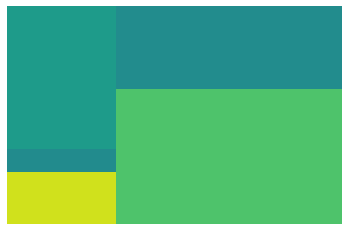

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import squarify

squarify.plot (sizes = [9, 4, 25, 49, 30])
label = ["A", "E", "I", "O", "U"]
color = ["red", "green", "blue", "pink", "grey"]

alpha = 0.3
plt.axis("off")
plt.show()

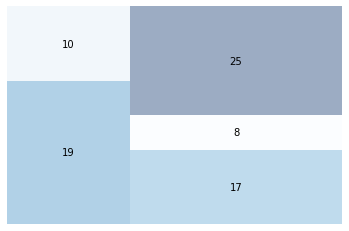

In [ ]:
valores = [19, 10, 17, 8, 25]
mapaDeColor = matplotlib.cm.Blues
norma = matplotlib.colors.Normalize(vmin=min(valores), vmax=max(valores))
colores = [mapaDeColor(norma(valor)) for valor in valores]
squarify.plot(sizes=valores,color=colores,alpha=0.4, label=[str(valor) for valor in valores])
plt.axis("off")
plt.show()

In [ ]:
 result = Dschool.loc[ (Dschool.Sex != "A")]
 labels = list(set(result["Min degree"]))
 labels

["associate's", 'high school', "master's", "bachelor's"]

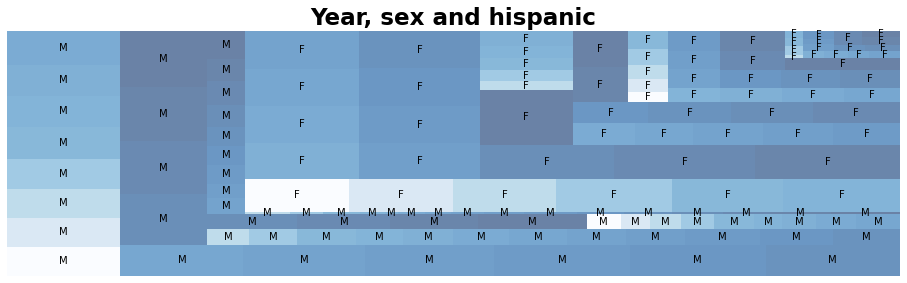

In [ ]:
dataAssists = Dschool.loc[(Dschool.Sex != "A")]

norm = matplotlib.colors.Normalize(vmin=min(dataAssists.Year), vmax=max(dataAssists.Year))
colors = [matplotlib.cm.Blues(norm(value)) for value in dataAssists.Year]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 4.5)

fig = plt.gcf()
fig.set_size_inches(16, 4.5)

squarify.plot(label=dataAssists.Sex,sizes=dataAssists.Hispanic, color = colors, alpha=.6)
plt.title("Year, sex and hispanic",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()

> Siento que esta librería es menos intuitiva que seaborn